In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import tqdm
import subprocess

SAMPLES_PER_EXPERIMENT = 100

In [2]:
def run_experiment(log_db_size, blocks_per_entry, samples, use_prefetching):
    prefetch = 1 if use_prefetching else 0
    cmd = f"./../bin/server {log_db_size} {blocks_per_entry} {samples} {prefetch}"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    output = result.stdout.strip().splitlines()
    throughput_line = output[-1]  # format example: Average throughput for 100 samples: 32258.71 MB/s, Std: 4986.56 MB/s

    throughput, std = re.findall(r"(\d+\.\d*) MB\/s", throughput_line)
    return float(throughput), float(std)

In [3]:
def run_experiments(use_prefetching):
    log_db_size = 30
    experiments = []
    for i in tqdm.tqdm(range(10)):
        blocks_per_entry = 1 << i
        throughput, std = run_experiment(log_db_size, blocks_per_entry, SAMPLES_PER_EXPERIMENT, use_prefetching)
        experiments.append((blocks_per_entry, throughput, std))
    df = pd.DataFrame(experiments, columns=["Blocks Per Entry", "Throughput (MB/s)", "Std"])
    plt.figure(figsize=(8, 5))
    plt.errorbar(df["Blocks Per Entry"], df["Throughput (MB/s)"], yerr=df["Std"], fmt='o', capsize=5)
    plt.xlabel("Blocks Per Entry")
    plt.ylabel("Throughput (MB/s)")
    plt.title("Throughput vs Blocks Per Entry (Error bars = Std)")
    plt.xscale("log", base=2)
    plt.grid(True)
    plt.show()

100%|██████████| 10/10 [02:50<00:00, 17.02s/it]


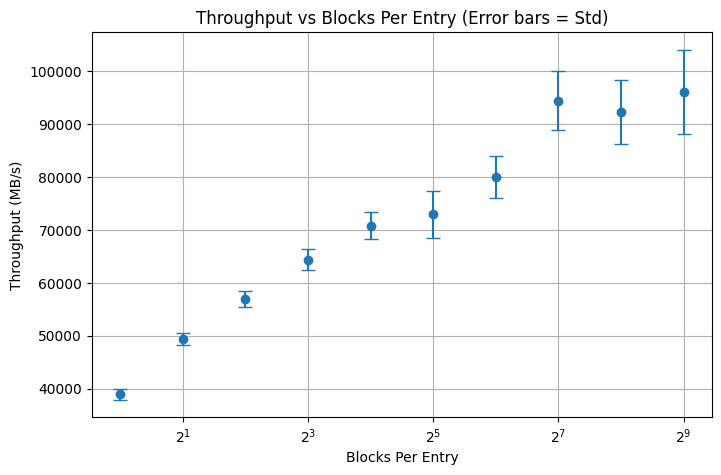

In [4]:
run_experiments(use_prefetching=True)

100%|██████████| 10/10 [02:51<00:00, 17.13s/it]


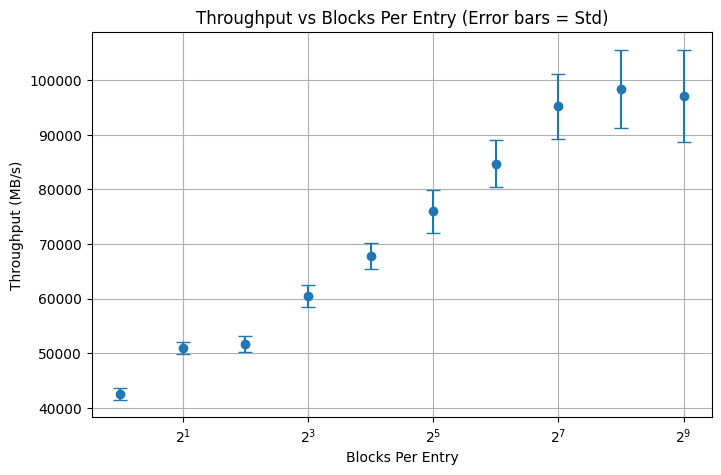

In [5]:
run_experiments(use_prefetching=False)